<a href="https://colab.research.google.com/github/UpendraVishwanathYS/Fundus-Image-Segementation/blob/main/Project_Fundus_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [ ]:
RIM_ONE_DL = '/content/drive/MyDrive/Dataset/RIM_one-DL'
Dristhi_GS = '/content/drive/MyDrive/Dataset/Dristhi_Gs'
RIM_ONE_V3 = '/content/drive/MyDrive/Dataset/RIM_ONE-v3' 

# Preprocessing

*Image Enhancement: Contrast level adaptive histogram  equalization*

In [ ]:
import numpy as np
from scipy import signal
import cv2
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def load_images_from_folder(folder):
    images = []
    file_name = []
    for filename in os.listdir(folder):
      file_name.append(filename)
      if filename.endswith(".jpg") or filename.endswith(".JPG") or filename.endswith(".png") :
            img = cv2.imread(os.path.join(folder, filename))
            if img is not None:
                images.append(img)
    return images,file_name
folder = '/content/drive/MyDrive/Dataset/RIM_one-DL/Test_dataset_random'
img,file_name = load_images_from_folder(folder)

def clahe(image):
  image = cv2.cvtColor(image,cv2.COLOR_RGB2Lab)
  l,a,b = cv2.split(image)
  clahe = cv2.createCLAHE(clipLimit = 3.0,tileGridSize = (8,8))
  clahe_image = clahe.apply(l)
  enhanced_image = cv2.merge((clahe_image,a,b))
  enhanced_image = cv2.resize(enhanced_image,(256,256),interpolation = cv2.INTER_AREA) #Image resizing
  enhanced_image = cv2.cvtColor(enhanced_image,cv2.COLOR_LAB2RGB)
  return enhanced_image


# image enhancement for all images:
en_img = []
path = '/content/drive/MyDrive/Dataset/Test_data' 
for i in range(0,len(img)):
  x = clahe(img[i])
  en_img.append(x)
  name = str(file_name[i])
  cv2.imwrite(os.path.join(path,name),x)


# ROI Detection

*RIM_ONE_V3 - Dataset*

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow

path= '/content/drive/MyDrive/Dataset/RIM_ONE-v3/Train_images'
path_1 = '/content/drive/MyDrive/Dataset/RIM_ONE-v3/Train_images'
count = 0
for images in os.listdir(path):
  img = cv2.imread(path+'/'+images)
  x = img.shape
  if images.endswith('-R.jpg'):
    img = cv2.imread(path+'/'+images)
    crop = img[300:int(img.shape[0]/1.3),img.shape[1]//2:]
    crop = cv2.resize(crop,(256,256))
    cv2.imwrite(os.path.join(path_1,images.replace('.jpg','.png')),crop)
    count = count+1
   
  if images.endswith('-L.jpg'):
    img = cv2.imread(path+'/'+images)
    crop = img[300:int(img.shape[0]/1.5),100:img.shape[1]//2]
    crop = cv2.resize(crop,(256,256))
    cv2.imwrite(os.path.join(path_1,images.replace('.jpg','.png')),crop)
    count = count+1

*Dristhi_GS - Dataset*

In [ ]:
# Storing Average Boundary .txt files:
import os
directory = '/content/drive/MyDrive/Dataset/Dristhi_Gs/Avg_bound/Test_GT'
import shutil

for filename in os.listdir(directory):
  new_path = directory + '/' + filename
  for GTfile in os.listdir(new_path):
    if GTfile == 'AvgBoundary':
      updated_path = new_path + '/'+GTfile
      for softmap in os.listdir(updated_path):
        if softmap == str(filename+"_ODAvgBoundary.txt"):
          last_path = updated_path +'/'+softmap
          folder = '/content/drive/MyDrive/Dataset/Dristhi_Gs/Avg_bound/Boundary_file'
          shutil.move(last_path,folder)

# Converting .txt files to .csv
import pandas as pd
import csv
import os
# reading given csv file
# and creating dataframe
path = '/content/drive/MyDrive/Dataset/Dristhi_Gs/Avg_bound/Boundary_file'
for filename in os.listdir(path):
  dataframe1 = pd.read_csv(path+'/'+filename)
  # storing this dataframe in a csv file
  account = pd.read_csv(path+'/'+filename,delimiter = ' ')
  if filename.endswith('.txt'):
    account.to_csv('/content/drive/MyDrive/Dataset/Dristhi_Gs/Avg_bound/ROI_csv'+'/'+str(filename.replace('.txt','.csv')),header=['A','B'])

# Finding ROI of the Fundus Images:
csv_path = '/content/drive/MyDrive/Dataset/Dristhi_Gs/Avg_bound/ROI_csv'
img_path = '/content/drive/MyDrive/Dataset/Dristhi_Gs/Test_data'
for images in os.listdir(img_path):
  for files in os.listdir(csv_path):
    verify = files.replace('_ODAvgBoundary.csv','.png')
    if images == verify:
      verify = verify.replace('.png','_ODAvgBoundary.csv')
      pathee = '/content/drive/MyDrive/Dataset/Dristhi_Gs/Avg_bound/ROI_csv'+'/'+verify
      data = pd.read_csv(pathee)
      img_pathee = '/content/drive/MyDrive/Dataset/Dristhi_Gs/Test_data' + '/' + images
      img = cv2.imread(img_pathee)
      img = img[min(data['A']):max(data['A']),min(data['B']):max(data['B'])]
      img = cv2.resize(img,(256,256))
      folder = '/content/drive/MyDrive/Dataset/Test_final'
      cv2.imwrite(os.path.join(folder,images),img) 

# Finding ROI of Cup_Mask:
csv_path = '/content/drive/MyDrive/Dataset/Dristhi_Gs/old_DGS/ROI_csv'
img_path = '/content/drive/MyDrive/Dataset/Dristhi_Gs/Mask_cup_Train'
for images in os.listdir(img_path):
  for files in os.listdir(csv_path):
    verify = files.replace('_ODAvgBoundary.csv','_cupsegSoftmap.png')
    if images == verify:
      verify = verify.replace('_cupsegSoftmap.png','_ODAvgBoundary.csv')
      pathee = '/content/drive/MyDrive/Dataset/Dristhi_Gs/old_DGS/ROI_csv'+'/'+verify
      data = pd.read_csv(pathee)
      img_pathee = '/content/drive/MyDrive/Dataset/Dristhi_Gs/Mask_cup_Train' + '/' + images
      img = cv2.imread(img_pathee)
      img = img[min(data['A']):max(data['A']),min(data['B']):max(data['B'])]
      img = cv2.resize(img,(256,256))
      folder = '/content/drive/MyDrive/Dataset/Dristhi_Gs/New_Mask_cup_Train'
      cv2.imwrite(os.path.join(folder,images),img)

# Finding Disc_mask:
csv_path = '/content/drive/MyDrive/Dataset/Dristhi_Gs/old_DGS/ROI_csv'
img_path = '/content/drive/MyDrive/Dataset/Dristhi_Gs/Mask_disk_train'
for images in os.listdir(img_path):
  for files in os.listdir(csv_path):
    verify = files.replace('_ODAvgBoundary.csv','_ODsegSoftmap.png')
    if images == verify:
      verify = verify.replace('_ODsegSoftmap.png','_ODAvgBoundary.csv')
      pathee = '/content/drive/MyDrive/Dataset/Dristhi_Gs/old_DGS/ROI_csv'+'/'+verify
      data = pd.read_csv(pathee)
      img_pathee = '/content/drive/MyDrive/Dataset/Dristhi_Gs/Mask_disk_train' + '/' + images
      img = cv2.imread(img_pathee)
      img = img[min(data['A']):max(data['A']),min(data['B']):max(data['B'])]
      img = cv2.resize(img,(256,256))
      folder = '/content/drive/MyDrive/Dataset/Dristhi_Gs/New_Mask_disc_train'
      cv2.imwrite(os.path.join(folder,images),img)

# Segmentation:

## ***UNET***

In [ ]:
import glob
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image
!pip install keras
n_classes = 3
train_images = []
train_masks = [] 
X = np.zeros((656,256,256,3),dtype = np.uint8)
Y = np.zeros((656,256,256,1),dtype = np.uint8)
i = 0
j=0
for images in os.listdir('/content/drive/MyDrive/Dataset/All_images'):
  img = cv2.imread('/content/drive/MyDrive/Dataset/All_images'+'/'+images)       
  img = cv2.resize(img, (256,256))
  train_images.append(img)
  name_imgg = images
  if name_imgg.endswith('-R.png'):
    name_img = images.split('-R.png')[0]
  elif name_imgg.endswith('-L.png'):
    name_img = images.split('-L.png')[0]
  elif name_imgg.endswith('-L_left_half.png'):
    name_img = images.split('-L_left_half.png')[0]
  elif name_imgg.endswith('-R_left_half.png'):
    name_img = images.split('-R_left_half.png')[0]     
  else:
    name_img = images.split('.png')[0]
    
  for masks in os.listdir('/content/drive/MyDrive/Dataset/All_mask'):
    name_mask_i = masks
    if name_mask_i.startswith('r2') or name_mask_i.startswith('r1'):
      name_mask = name_mask_i.split('-1_mask.png')[0]
    else:
      name_mask = name_mask_i.split('_mask.png')[0]
    
    if name_mask==name_img:
      mask_ = Image.open('/content/drive/MyDrive/Dataset/All_mask'+'/'+masks)
      mask_ = mask_.convert('L')
      mask = np.expand_dims(mask_,axis=-1)
      mask= np.where(mask<128,0,mask)
      mask = np.where(mask==128,1,mask)
      mask = np.where(mask>128,2,mask)
      train_masks.append(mask)
      break
  X[i] = img
  Y[i] = mask
  i = i+1

#Convert list to array for machine learning processing   
train_images = np.array(train_images)
print(X.shape)       
train_masks = np.array(train_masks)
print(Y.shape)

#Encode labels... but multi dim array so need to flatten, encode and reshape
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w, m  = Y.shape
train_masks_reshaped = Y.reshape(-1,1)
train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(n, h, w)
print(np.unique(train_masks_encoded_original_shape))
#################################################
from tensorflow.keras.utils import normalize
#train_images = normalize(train_images, axis=1)
train_masks_input = np.expand_dims(train_masks_encoded_original_shape, axis=3)
print(np.unique(train_masks_input))
###############################################################

print(train_masks_input.shape)
 # 0 is the background/few unlabeled 

from tensorflow.keras.utils import to_categorical
train_masks_cat = to_categorical(train_masks_input, num_classes=3)
y_train_cat = train_masks_cat.reshape((656, 256, 256, 3))

print(y_train_cat.shape)

#test_masks_cat = to_categorical(y_test, num_classes=n_classes)
#y_test_cat = test_masks_cat.reshape((656, 256, 256, n_classes))


from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                 classes = np.unique(train_masks_reshaped_encoded),
                                                 y = train_masks_reshaped_encoded)
print("Class weights are...:", class_weights)

import matplotlib.pyplot as plt
Input_images = train_images
Input_masks = y_train_cat


(656, 256, 256, 3)
(656, 256, 256, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 1 2]
[0 1 2]
(656, 256, 256, 1)
(656, 256, 256, 3)
Class weights are...: [0.51676533 1.31983876 3.25502458]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Apr 11 14:02:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


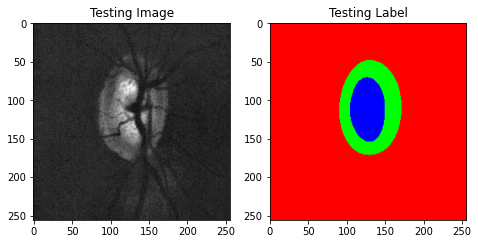

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(Input_images[120][:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(np.reshape(Input_masks[120],(256,256,3)), cmap='jet')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Input_images, Input_masks, test_size=0.1, random_state=42) 

In [ ]:
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
input_width = 256
input_height = 256
input_channel = 3
n_classes = 3


def Unet(n_classes,input_width,input_height,input_channel):
  from keras.models import Model
  #Contraction
  Input = tf.keras.layers.Input((input_width,input_height,input_channel))
  s = tf.keras.layers.Lambda(lambda x: x/255)(Input)
  c1 = tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', kernel_initializer='he_normal',padding='same')(s)
  c1 = tf.keras.layers.Dropout(0.1)(c1)
  c1 = tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', kernel_initializer='he_normal',padding='same')(c1)
  p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)
    
  c2 = tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', kernel_initializer='he_normal',padding='same')(p1)
  c2 = tf.keras.layers.Dropout(0.1)(c2)
  c2 = tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', kernel_initializer='he_normal',padding='same')(c2)
  p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)
    
  c3 = tf.keras.layers.Conv2D(64,(3,3),activation = 'relu', kernel_initializer='he_normal',padding='same')(p2)
  c3 = tf.keras.layers.Dropout(0.1)(c3)
  c3 = tf.keras.layers.Conv2D(64,(3,3),activation = 'relu', kernel_initializer='he_normal',padding='same')(c3)
  p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)
    
  c4 = tf.keras.layers.Conv2D(128,(3,3),activation = 'relu', kernel_initializer='he_normal',padding='same')(p3)
  c4 = tf.keras.layers.Dropout(0.1)(c4)
  c4 = tf.keras.layers.Conv2D(128,(3,3),activation = 'relu', kernel_initializer='he_normal',padding='same')(c4)
  p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)
    
  c5 = tf.keras.layers.Conv2D(256,(3,3),activation = 'relu', kernel_initializer='he_normal',padding='same')(p4)
  c5 = tf.keras.layers.Dropout(0.1)(c5)
  c5 = tf.keras.layers.Conv2D(256,(3,3),activation = 'relu', kernel_initializer='he_normal',padding='same')(c5)
    
    #Expansion
  u6 = tf.keras.layers.Conv2DTranspose(128,(2,2),strides = (2,2),padding='same')(c5)
  u6 = tf.keras.layers.concatenate([u6,c4])
  c6 = tf.keras.layers.Conv2D(128,(3,3),activation = 'relu', kernel_initializer='he_normal',padding='same')(u6)
  c6 = tf.keras.layers.Dropout(0.1)(c6)
  c6 = tf.keras.layers.Conv2D(128,(3,3),activation = 'relu', kernel_initializer='he_normal',padding='same')(c6)
    
  u7 = tf.keras.layers.Conv2DTranspose(64,(2,2),strides = (2,2),padding='same')(c6)
  u7 = tf.keras.layers.concatenate([u7,c3])
  c7 = tf.keras.layers.Conv2D(64,(3,3),activation = 'relu', kernel_initializer='he_normal',padding='same')(u7)
  c7 = tf.keras.layers.Dropout(0.1)(c7)
  c7 = tf.keras.layers.Conv2D(64,(3,3),activation = 'relu', kernel_initializer='he_normal',padding='same')(c7)
    
  u8 = tf.keras.layers.Conv2DTranspose(32,(2,2),strides = (2,2),padding='same')(c7)
  u8 = tf.keras.layers.concatenate([u8,c2])
  c8 = tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', kernel_initializer='he_normal',padding='same')(u8)
  c8 = tf.keras.layers.Dropout(0.1)(c8)
  c8 = tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', kernel_initializer='he_normal',padding='same')(c8)
    
  u9 = tf.keras.layers.Conv2DTranspose(16,(2,2),strides = (2,2),padding='same')(c8)
  u9 = tf.keras.layers.concatenate([u9,c1])
  c9 = tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', kernel_initializer='he_normal',padding='same')(u9)
  c9 = tf.keras.layers.Dropout(0.1)(c9)
  c9 = tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', kernel_initializer='he_normal',padding='same')(c9)
    
  output = tf.keras.layers.Conv2D(n_classes,(1,1),activation ='softmax')(c9)
  model = Model(inputs=[Input], outputs=[output]) 
  return model


print(X_test.shape)


(33, 256, 256, 3)


In [ ]:
!pip install keras_unet_collection

     |████████████████████████████████| 67 kB 6.7 MB/s 


In [ ]:
from keras_unet_collection import losses
metrics=['accuracy', losses.dice_coef]
model = Unet(n_classes,input_width,input_height,input_channel)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', losses.dice_coef])
model.summary()


callbacks = [tf.keras.callbacks.TensorBoard(log_dir='/content/drive/MyDrive/Data Augmentation/Logs/logs')]

history = model.fit(X_train, y_train,batch_size = 16, verbose=1, epochs=200,validation_data=(X_valid,y_valid),callbacks=callbacks)

 

#print('Test accuracy:', test_acc)

In [ ]:
test_loss, test_acc,test_dice = model.evaluate(X_test,y_test, verbose=1)
print('Test accuracy:', test_acc)

2/2 [==============================] - 3s 18ms/step - loss: 0.3834 - accuracy: 0.9461 - dice_coef: 0.9662
Test accuracy: 0.9461480379104614


In [ ]:
import random
test_img_number = random.randint(0, X_test.shape[0]-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = model.predict(test_img_input)
predicted_img=np.argmax(prediction, axis=3)[0,:,:]


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(np.reshape(ground_truth,(256,256,3)), cmap='jet')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img, cmap='jet')
plt.show()

In [ ]:
!pip install segmentation_models
import segmentation_models as sm

metric=[sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

     |████████████████████████████████| 50 kB 8.4 MB/s 
Segmentation Models: using `keras` framework.


## ***UNET***

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras_unet_collection import models, losses
from keras_unet_collection import models
import tensorflow.keras.callbacks


model = models.unet_2d((256, 256, 3), [64, 128, 256, 512, 1024], n_labels=3,
                      stack_num_down=2, stack_num_up=1,
                      activation='GELU', output_activation='Softmax', 
                      batch_norm=True, pool='max', unpool='nearest', name='unet')

model.compile(loss='categorical_crossentropy',optimizer=Adam(lr = 1e-3), 
              metrics=['accuracy', losses.dice_coef])

print(model.summary())

filepath = "/content/drive/MyDrive/unet_model.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='loss', verbose=0,save_best_only=True, mode='min')
callbacks_list = [checkpoint]

model.fit(X_train, y_train, batch_size = 8,validation_data=(X_valid, y_valid), 
                    epochs=100,callbacks=callbacks_list)

model.save(filepath)

Model: "unet_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 unet_down0_0 (Conv2D)          (None, 256, 256, 64  1728        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 unet_down0_0_bn (BatchNormaliz  (None, 256, 256, 64  256        ['unet_down0_0[0][0]']           
 ation)                         )                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


                                8)                               [0]']                            
                                                                                                  
 unet_down1_conv_1_bn (BatchNor  (None, 128, 128, 12  512        ['unet_down1_conv_1[0][0]']      
 malization)                    8)                                                                
                                                                                                  
 unet_down1_conv_1_activation (  (None, 128, 128, 12  0          ['unet_down1_conv_1_bn[0][0]']   
 GELU)                          8)                                                                
                                                                                                  
 unet_down2_encode_maxpool (Max  (None, 64, 64, 128)  0          ['unet_down1_conv_1_activation[0]
 Pooling2D)                                                      [0]']                            
          

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras_unet_collection import models, losses
from keras_unet_collection import models
import tensorflow.keras.callbacks

!pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 33.7 MB/s 


In [ ]:
!pip install keras-buoy

     |████████████████████████████████| 462 kB 1.6 MB/s 
  Created wheel for keras-buoy: filename=keras_buoy-0.1.4.1-py2.py3-none-any.whl size=6701 sha256=acea78dad922fb35a91641d6d0bba6d650746c6c0bcdad7aa71d1bf41a3b3169
  Stored in directory: /root/.cache/pip/wheels/4c/8c/65/cb5c62db3a0e046a72cd2c5b6493c48c58b0029754488d2830
Successfully built keras-buoy


In [ ]:
import tensorflow.keras.models
import tensorflow_addons as tfa
from tensorflow_addons.layers import GELU
from keras import backend as K
from tensorflow import keras
from keras_buoy.models import ResumableModel

def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return (2. * intersection + smooth) / (K.sum(K.square(y_true),-1) + K.sum(K.square(y_pred),-1) + smooth)

model = tensorflow.keras.models.load_model('/content/drive/MyDrive/unet_model.h5',custom_objects = {'GELU':GELU,'dice_coef':dice_coef})
resumable_model = ResumableModel(model,custom_objects = {'GELU':GELU,'dice_coef':dice_coef},to_path='/content/drive/MyDrive/unet_model_updated.h5')
history = resumable_model.fit(X_train, y_train,validation_data=(X_valid, y_valid), epochs=50,batch_size = 8)


Epoch 1/50
74/74 [==============================] - 131s 2s/step - loss: 0.0317 - accuracy: 0.9864 - dice_coef: 0.9927 - val_loss: 0.2716 - val_accuracy: 0.9352 - val_dice_coef: 0.9619
Epoch 2/50
74/74 [==============================] - 109s 1s/step - loss: 0.0308 - accuracy: 0.9868 - dice_coef: 0.9929 - val_loss: 0.2576 - val_accuracy: 0.9352 - val_dice_coef: 0.9621
Epoch 3/50
74/74 [==============================] - 110s 1s/step - loss: 0.0357 - accuracy: 0.9847 - dice_coef: 0.9918 - val_loss: 0.2653 - val_accuracy: 0.9373 - val_dice_coef: 0.9631
Epoch 4/50
74/74 [==============================] - 109s 1s/step - loss: 0.0321 - accuracy: 0.9862 - dice_coef: 0.9926 - val_loss: 0.2822 - val_accuracy: 0.9382 - val_dice_coef: 0.9634
Epoch 5/50
74/74 [==============================] - 109s 1s/step - loss: 0.0304 - accuracy: 0.9869 - dice_coef: 0.9930 - val_loss: 0.2707 - val_accuracy: 0.9372 - val_dice_coef: 0.9630
Epoch 6/50
74/74 [==============================] - 109s 1s/step - loss: 0.

In [ ]:
import tensorflow.keras.models
import tensorflow_addons as tfa
from tensorflow_addons.layers import GELU
from keras import backend as K
from tensorflow import keras
from keras_buoy.models import ResumableModel

def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return (2. * intersection + smooth) / (K.sum(K.square(y_true),-1) + K.sum(K.square(y_pred),-1) + smooth)

model = tensorflow.keras.models.load_model('/content/drive/MyDrive/unet_model_updated.h5',custom_objects = {'GELU':GELU,'dice_coef':dice_coef})
resumable_model = ResumableModel(model,custom_objects = {'GELU':GELU,'dice_coef':dice_coef},to_path='/content/drive/MyDrive/unet_model_updated_150.h5')
history = resumable_model.fit(X_train, y_train,validation_data=(X_valid, y_valid), epochs=50,batch_size = 8)

Epoch 1/50
74/74 [==============================] - 115s 2s/step - loss: 0.0163 - accuracy: 0.9929 - dice_coef: 0.9962 - val_loss: 0.3516 - val_accuracy: 0.9394 - val_dice_coef: 0.9627
Epoch 2/50
74/74 [==============================] - 112s 2s/step - loss: 0.0158 - accuracy: 0.9932 - dice_coef: 0.9963 - val_loss: 0.3609 - val_accuracy: 0.9391 - val_dice_coef: 0.9625
Epoch 3/50
74/74 [==============================] - 111s 2s/step - loss: 0.0164 - accuracy: 0.9929 - dice_coef: 0.9962 - val_loss: 0.3595 - val_accuracy: 0.9383 - val_dice_coef: 0.9620
Epoch 4/50
74/74 [==============================] - 111s 2s/step - loss: 0.0165 - accuracy: 0.9929 - dice_coef: 0.9962 - val_loss: 0.3604 - val_accuracy: 0.9385 - val_dice_coef: 0.9622
Epoch 5/50
74/74 [==============================] - 111s 2s/step - loss: 0.0152 - accuracy: 0.9934 - dice_coef: 0.9965 - val_loss: 0.3720 - val_accuracy: 0.9391 - val_dice_coef: 0.9624
Epoch 6/50
74/74 [==============================] - 111s 2s/step - loss: 0.

In [ ]:
import tensorflow.keras.models
import tensorflow_addons as tfa
from tensorflow_addons.layers import GELU
from keras import backend as K
from tensorflow import keras
from keras_buoy.models import ResumableModel

def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return (2. * intersection + smooth) / (K.sum(K.square(y_true),-1) + K.sum(K.square(y_pred),-1) + smooth)

model = tensorflow.keras.models.load_model('/content/drive/MyDrive/unet_model_updated_150.h5',custom_objects = {'GELU':GELU,'dice_coef':dice_coef})
resumable_model = ResumableModel(model,custom_objects = {'GELU':GELU,'dice_coef':dice_coef},to_path='/content/drive/MyDrive/unet_model_updated_200.h5')
history = resumable_model.fit(X_train, y_train,validation_data=(X_valid, y_valid), epochs=50,batch_size = 8)

Epoch 1/50
74/74 [==============================] - 142s 2s/step - loss: 0.0124 - accuracy: 0.9947 - dice_coef: 0.9971 - val_loss: 0.4512 - val_accuracy: 0.9390 - val_dice_coef: 0.9619
Epoch 2/50
74/74 [==============================] - 110s 1s/step - loss: 0.0128 - accuracy: 0.9945 - dice_coef: 0.9970 - val_loss: 0.4335 - val_accuracy: 0.9392 - val_dice_coef: 0.9621
Epoch 3/50
74/74 [==============================] - 110s 1s/step - loss: 0.0130 - accuracy: 0.9944 - dice_coef: 0.9970 - val_loss: 0.4608 - val_accuracy: 0.9403 - val_dice_coef: 0.9626
Epoch 4/50
74/74 [==============================] - 110s 1s/step - loss: 0.0121 - accuracy: 0.9948 - dice_coef: 0.9972 - val_loss: 0.4738 - val_accuracy: 0.9375 - val_dice_coef: 0.9609
Epoch 5/50
74/74 [==============================] - 110s 1s/step - loss: 0.0125 - accuracy: 0.9946 - dice_coef: 0.9971 - val_loss: 0.4655 - val_accuracy: 0.9372 - val_dice_coef: 0.9608
Epoch 6/50
74/74 [==============================] - 110s 1s/step - loss: 0.

In [ ]:
model = tensorflow.keras.models.load_model('/content/drive/MyDrive/unet_model_updated_200.h5',custom_objects = {'GELU':GELU,'dice_coef':dice_coef})
test_loss, test_acc,test_dice = model.evaluate(X_test,y_test, verbose=1)
print('Test accuracy:', test_acc)

2/2 [==============================] - 2s 135ms/step - loss: 0.4247 - accuracy: 0.9506 - dice_coef: 0.9690
Test accuracy: 0.9505615234375


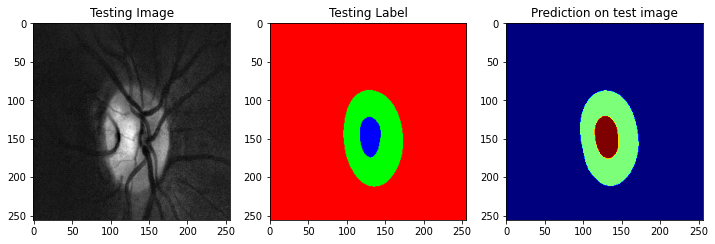

In [ ]:
import random
test_img_number = random.randint(0, X_test.shape[0]-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = model.predict(test_img_input)
predicted_img=np.argmax(prediction, axis=3)[0,:,:]


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(np.reshape(ground_truth,(256,256,3)), cmap='jet')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img, cmap='jet')
plt.show()

## ***Attention UNET***

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras_unet_collection import models, losses
from keras_unet_collection import models
import tensorflow.keras.callbacks
model = models.att_unet_2d((256, 256, 3), [64, 128, 256, 512], n_labels=3,
                           stack_num_down=2, stack_num_up=2,
                           activation='ReLU', atten_activation='ReLU', attention='add', output_activation='Softmax', 
                           batch_norm=True, pool=False, unpool='bilinear', name='attunet')

model.compile(loss='categorical_crossentropy',optimizer=Adam(lr = 1e-3), 
              metrics=['accuracy', losses.dice_coef])

print(model.summary())
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr = 1e-3), 
              metrics=['accuracy', losses.dice_coef])

print(model.summary())


filepath = "/content/drive/MyDrive/Attention_unet_model.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='loss', verbose=0,save_best_only=True, mode='min')
callbacks_list = [checkpoint]

model.fit(X_train, y_train, batch_size = 8,validation_data=(X_valid, y_valid), 
                    epochs=100,callbacks=callbacks_list)

model.save(filepath)

Model: "attunet_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 attunet_down0_0 (Conv2D)       (None, 256, 256, 64  1728        ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 attunet_down0_0_bn (BatchNorma  (None, 256, 256, 64  256        ['attunet_down0_0[0][0]']        
 lization)                      )                                                     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


                                                                  'attunet_up1_att_sigmoid[0][0]']
                                                                                                  
 attunet_up1_concat (Concatenat  (None, 128, 128, 38  0          ['attunet_up1_decode_unpool[0][0]
 e)                             4)                               ',                               
                                                                  'attunet_up1_att_masking[0][0]']
                                                                                                  
 attunet_up1_conv_after_concat_  (None, 128, 128, 12  442368     ['attunet_up1_concat[0][0]']     
 0 (Conv2D)                     8)                                                                
                                                                                                  
 attunet_up1_conv_after_concat_  (None, 128, 128, 12  512        ['attunet_up1_conv_after_concat_0
 0_bn (Bat

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras_unet_collection import models, losses
from keras_unet_collection import models
import tensorflow.keras.callbacks

!pip install tensorflow_addons
!pip install keras-buoy

     |████████████████████████████████| 462 kB 4.2 MB/s 
  Created wheel for keras-buoy: filename=keras_buoy-0.1.4.1-py2.py3-none-any.whl size=6701 sha256=c362077a4955bcb859c9600ff644b2d0e3618d96f1a9b1d7df3afe3295c1c8b2
  Stored in directory: /root/.cache/pip/wheels/4c/8c/65/cb5c62db3a0e046a72cd2c5b6493c48c58b0029754488d2830
Successfully built keras-buoy


In [ ]:
import tensorflow.keras.models
import tensorflow_addons as tfa
from tensorflow_addons.layers import GELU
from keras import backend as K
from tensorflow import keras
from keras_buoy.models import ResumableModel

def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return (2. * intersection + smooth) / (K.sum(K.square(y_true),-1) + K.sum(K.square(y_pred),-1) + smooth)

model = tensorflow.keras.models.load_model('/content/drive/MyDrive/Attention_unet_model.h5',custom_objects = {'GELU':GELU,'dice_coef':dice_coef})
resumable_model = ResumableModel(model,custom_objects = {'GELU':GELU,'dice_coef':dice_coef},to_path='/content/drive/MyDrive/Attention_unet_updated_model.h5')
history = resumable_model.fit(X_train, y_train,validation_data=(X_valid, y_valid), epochs=100,batch_size = 8)


Epoch 1/100
74/74 [==============================] - 126s 1s/step - loss: 0.1938 - accuracy: 0.9253 - dice_coef: 0.9588 - val_loss: 0.6722 - val_accuracy: 0.8547 - val_dice_coef: 0.9175
Epoch 2/100
74/74 [==============================] - 92s 1s/step - loss: 0.0766 - accuracy: 0.9686 - dice_coef: 0.9828 - val_loss: 0.2398 - val_accuracy: 0.9214 - val_dice_coef: 0.9556
Epoch 3/100
74/74 [==============================] - 92s 1s/step - loss: 0.0374 - accuracy: 0.9844 - dice_coef: 0.9916 - val_loss: 0.2124 - val_accuracy: 0.9310 - val_dice_coef: 0.9610
Epoch 4/100
74/74 [==============================] - 92s 1s/step - loss: 0.0284 - accuracy: 0.9880 - dice_coef: 0.9935 - val_loss: 0.2441 - val_accuracy: 0.9309 - val_dice_coef: 0.9600
Epoch 5/100
74/74 [==============================] - 92s 1s/step - loss: 0.0236 - accuracy: 0.9900 - dice_coef: 0.9946 - val_loss: 0.2526 - val_accuracy: 0.9338 - val_dice_coef: 0.9612
Epoch 6/100
74/74 [==============================] - 92s 1s/step - loss: 0

In [ ]:
test_loss, test_acc,test_dice = model.evaluate(X_test,y_test, verbose=1)
print('Test accuracy:', test_acc)

2/2 [==============================] - 19s 110ms/step - loss: 0.3308 - accuracy: 0.9458 - dice_coef: 0.9664
Test accuracy: 0.945777177810669


In [ ]:
def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return (2. * intersection + smooth) / (K.sum(K.square(y_true),-1) + K.sum(K.square(y_pred),-1) + smooth)

model = tensorflow.keras.models.load_model('/content/drive/MyDrive/Attention_unet_updated_model.h5',custom_objects = {'GELU':GELU,'dice_coef':dice_coef})
#history = resumable_model.fit(X_train, y_train,validation_data=(X_valid, y_valid), epochs=1,batch_size = 8)

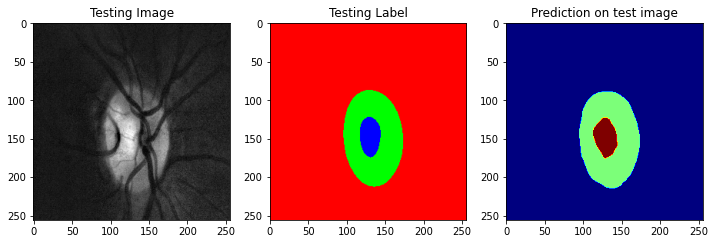

In [ ]:
import random
test_img_number = random.randint(0, X_test.shape[0]-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = model.predict(test_img_input)
predicted_img=np.argmax(prediction, axis=3)[0,:,:]


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(np.reshape(ground_truth,(256,256,3)), cmap='jet')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img, cmap='jet')
plt.show()